[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[*********************100%%**********************]  1 of 1 completed
                           Open        High         Low       Close  \
Datetime                                                              
2024-01-02 09:30:00  250.080002  250.899994  244.410004  248.794006   
2024-01-02 10:00:00  248.779999  251.250000  248.050003  249.610001   
2024-01-02 10:30:00  249.600006  249.638199  246.820007  248.919998   
2024-01-02 11:00:00  248.899994  250.259995  248.339996  250.000000   
2024-01-02 11:30:00  249.994095  251.000000  249.900101  250.475403   
...                         ...         ...         ...         ...   
2024-01-26 13:30:00  183.490097  183.630005  182.291000  182.644394   
2024-01-26 14:00:00  182.654999  182.660004  182.100006  182.280106   
2024-01-26 14:30:00  182.300003  183.380005  182.119995  183.270004   
2024-01-26 15:00:00  183.270004  183.320007  182.380005  182.630005   
2024-01-26 15:30:00  182.629898  183.470001  182.610001  183.229904   

       

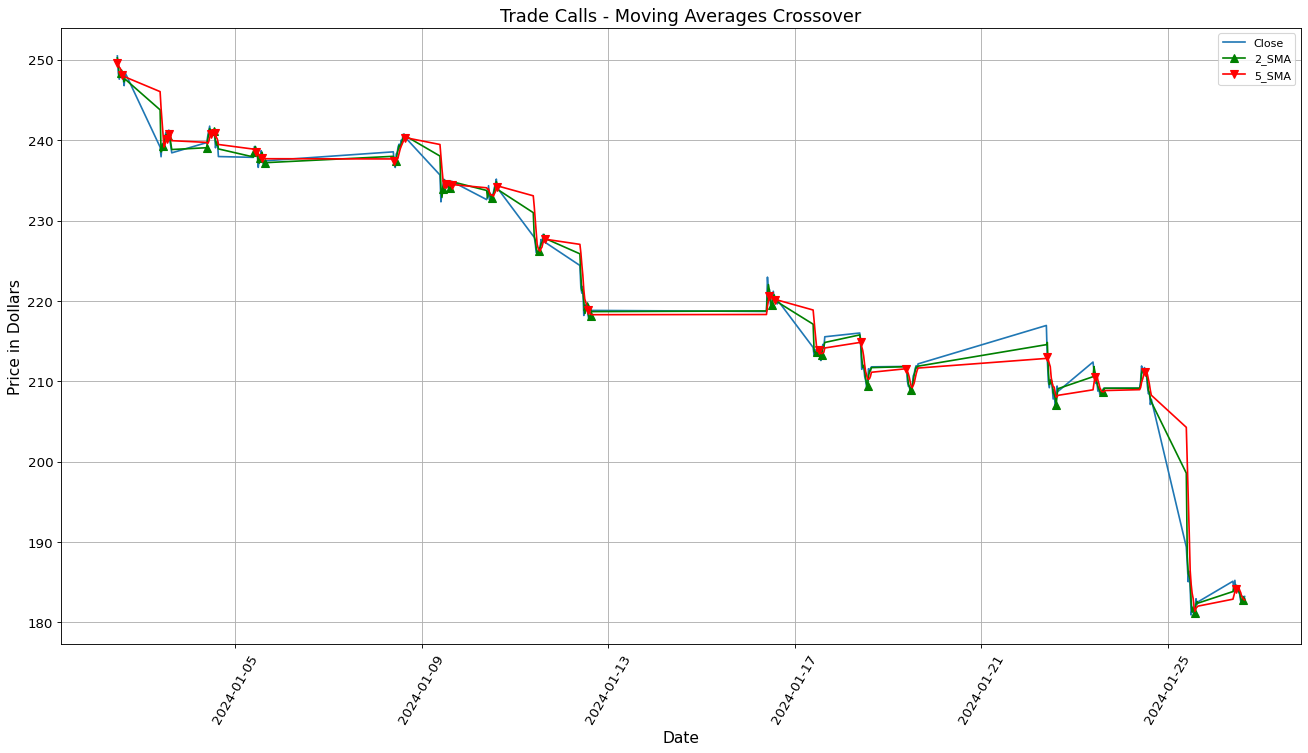

In [4]:
import pandas as pd
import requests 
from finVADER import finvader
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell

In [5]:
news_df = pd.read_csv('tsla_merged.csv')

final_news = news_df.loc[:,['date','comment_text']]
final_news['date'] = pd.to_datetime(final_news['date'])
final_news.sort_values(by='date',inplace=True)
final_news

,date,comment_text
368,2023-10-20 03:26:10,"TL,DR: tesla is fucked."
378,2023-10-20 03:38:00,Fucked
370,2023-10-20 05:09:01,Wouldn’t it be safe to say that Tesla has grea...
372,2023-10-20 05:29:44,Proper fucked
367,2023-10-20 06:24:40,"Turns out, Tesla is a car company"
...,...,...
504,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...
450,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult..."
457,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....
1420,2024-01-30 13:27:24,"Lol, I Day traded today tsla to the long side ..."


In [6]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [7]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["date"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

final_news['compound_finvader_score'] = final_news['comment_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_1260\2594099848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1260\2594099848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['compound_finvader_score'] = final_news['comment_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")


,date,comment_text,trading_time,Date,compound_finvader_score
368,2023-10-20 03:26:10,"TL,DR: tesla is fucked.",2023-10-20 13:30:00,2023-10-20,-0.6597
378,2023-10-20 03:38:00,Fucked,2023-10-20 13:30:00,2023-10-20,-0.6597
370,2023-10-20 05:09:01,Wouldn’t it be safe to say that Tesla has grea...,2023-10-20 13:30:00,2023-10-20,0.0200
372,2023-10-20 05:29:44,Proper fucked,2023-10-20 13:30:00,2023-10-20,-0.6597
367,2023-10-20 06:24:40,"Turns out, Tesla is a car company",2023-10-20 13:30:00,2023-10-20,0.0000
...,...,...,...,...,...
2212,2024-01-30 09:58:07,honestly elon laughing on the earnings call wa...,2024-01-30 13:30:00,2024-01-30,0.7367
504,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...,2024-01-30 13:30:00,2024-01-30,-0.4888
450,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult...",2024-01-30 13:30:00,2024-01-30,-0.0052
457,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....,2024-01-30 13:30:00,2024-01-30,-0.3105


In [8]:
# final_news['compound_finvader_score'] = cs
final_news = final_news[(final_news[['compound_finvader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,date,comment_text,trading_time,Date,compound_finvader_score
0,2023-10-20 03:26:10,"TL,DR: tesla is fucked.",2023-10-20 13:30:00,2023-10-20,-0.6597
1,2023-10-20 03:38:00,Fucked,2023-10-20 13:30:00,2023-10-20,-0.6597
2,2023-10-20 05:09:01,Wouldn’t it be safe to say that Tesla has grea...,2023-10-20 13:30:00,2023-10-20,0.0200
3,2023-10-20 05:29:44,Proper fucked,2023-10-20 13:30:00,2023-10-20,-0.6597
4,2023-10-20 07:32:13,It’s all finally catching up to them. It was g...,2023-10-20 13:30:00,2023-10-20,0.5423
...,...,...,...,...,...
2842,2024-01-30 09:58:07,honestly elon laughing on the earnings call wa...,2024-01-30 13:30:00,2024-01-30,0.7367
2843,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...,2024-01-30 13:30:00,2024-01-30,-0.4888
2844,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult...",2024-01-30 13:30:00,2024-01-30,-0.0052
2845,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....,2024-01-30 13:30:00,2024-01-30,-0.3105


In [9]:
#Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_finvader_score"].max() > 0:
        max_cs.append(data["compound_finvader_score"].max())
    elif data["compound_finvader_score"].max() < 0:
        max_cs.append(0)

    if data["compound_finvader_score"].min() < 0:
        min_cs.append(data["compound_finvader_score"].min())
    elif data["compound_finvader_score"].min() > 0:
        min_cs.append(0)

In [10]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating finVader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2023-10-20,0.9002,-0.6597,0.2405
1,2023-10-23,0.6020,0.0000,0.6020
2,2023-10-30,0.0000,-0.2960,-0.2960
3,2023-11-10,0.7401,-0.6684,0.0717
4,2023-11-13,0.9507,-0.8219,0.1288
5,2023-11-20,0.0039,0.0000,0.0039
6,2023-11-22,0.8876,-0.8398,0.0478
7,2023-11-23,0.7087,-0.9119,-0.2032
8,2023-11-24,0.7496,-0.9531,-0.2035
9,2023-11-27,0.6280,-0.3777,0.2503


In [11]:
#Using final compound finVADER scores with threshold to generate trade calls
# finVADER trade calls - with threshold
finvader_Buy=[]
finvader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.33:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.33:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

finvader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Buy:
        finvader_buy.append(i)

finvader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Sell:
        finvader_sell.append(i)

print(finvader_buy)
print(finvader_sell)

Trade Call for 2023-10-23 is Buy.
Trade Call for 2023-12-18 is Buy.
Trade Call for 2024-01-01 is Buy.
Trade Call for 2024-01-10 is Sell.
Trade Call for 2024-01-15 is Buy.
Trade Call for 2024-01-24 is Sell.
[]
[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


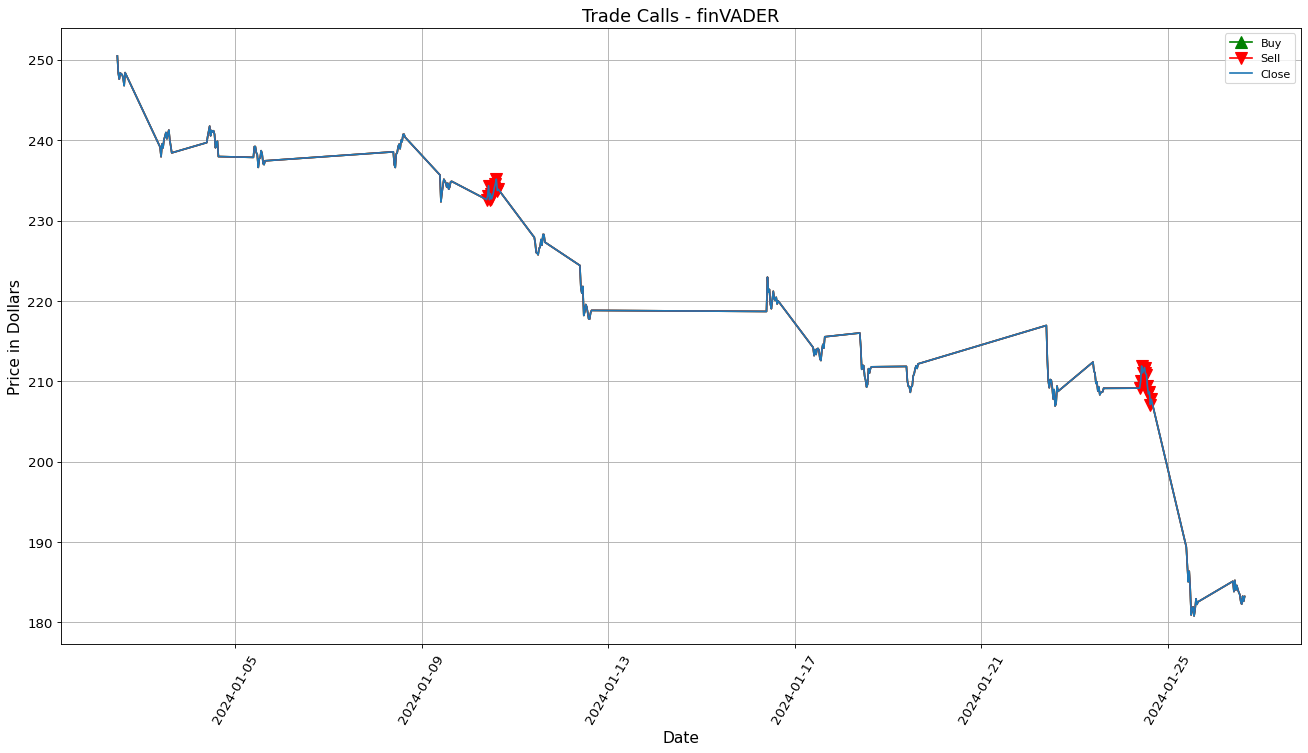

In [12]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=finvader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=finvader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - finVADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show()

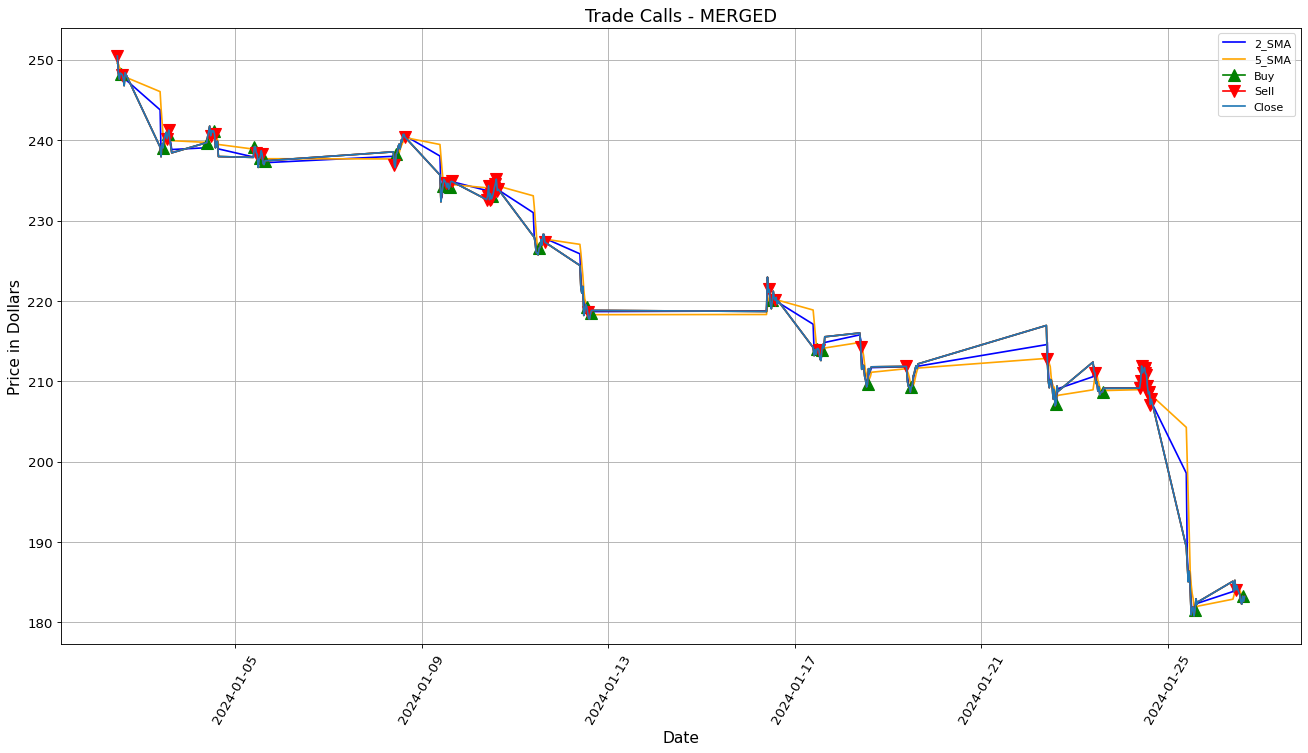

In [13]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + finvader_buy) - set(Trade_Sell))
final_sell = list(set(Trade_Sell + finvader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show()

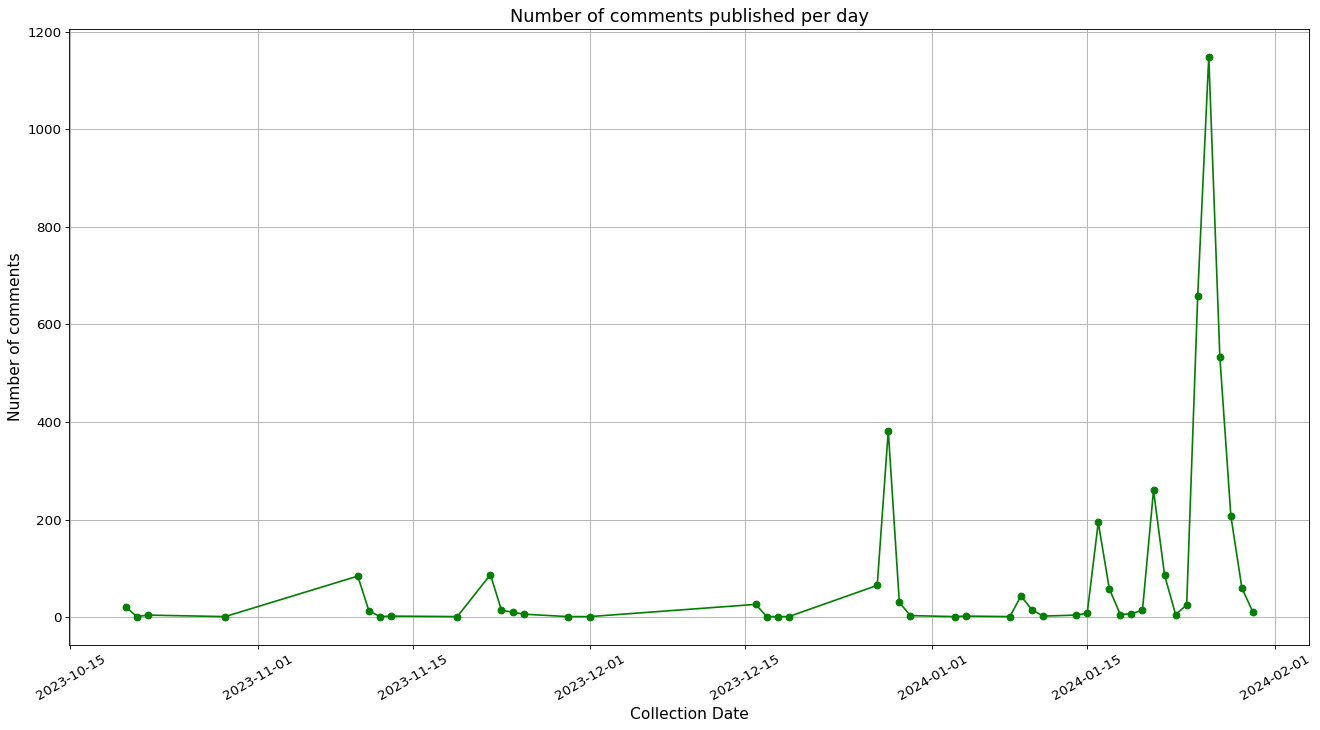

In [14]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['Date'] = news_df['date'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('Date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of comments published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of comments',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()